## Data Cleaning,Modelling and Building A Sentiment Analysis Model

We seek to visually represent the context of the tweets 

In [46]:
#importing requisite libraries
import matplotlib.pyplot as plt
from matplotlib import figure
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
#print(stopwords.words('english'))
import numpy as np
import re
#from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns
import preprocessor
from preprocessor import clean
global str

In [47]:
df=pd.read_csv("C:/Users/HP/Desktop/Sentiment Analysis On Tweets Mentioning Blood Sisters-A Netflix Movie/result.csv",sep=',',on_bad_lines='skip')

In [48]:
df

,2022-05-21 09:43:20+00:00,"b""@Frankdeburgh @HenshawKate She's just interpreting the mischief and meanness of Kola's Mom.\n#BloodSisters"""
0,2022-05-21 09:24:39+00:00,b'RT @NetflixNaija: This friendship is thicker...
1,2022-05-21 09:18:00+00:00,"b'RT @ISWISPodcast: FK or Jola, Who is more li..."
2,2022-05-21 09:06:41+00:00,"b'RT @ISWISPodcast: FK or Jola, Who is more li..."
3,2022-05-21 09:05:02+00:00,"b""The audition will be for a supporting or cam..."
4,2022-05-21 09:05:01+00:00,"b""You could be selected for the next EbonyLife..."
...,...,...
594,2022-05-30 17:04:59+00:00,b'Another Episode of #4CornersPodcast OUT NOW....
595,2022-05-30 17:04:51+00:00,b'Another Episode of #4CornersPodcast OUT NOW....
596,2022-05-30 15:42:04+00:00,b'I finished watching #bloodsisters and come r...
597,2022-05-30 15:04:00+00:00,"b'#BloodSisters was worth the hype, I loved d ..."


In [49]:
#adding column titles
df.columns=['tweet_time','full_text']

In [50]:
df

,tweet_time,full_text
0,2022-05-21 09:24:39+00:00,b'RT @NetflixNaija: This friendship is thicker...
1,2022-05-21 09:18:00+00:00,"b'RT @ISWISPodcast: FK or Jola, Who is more li..."
2,2022-05-21 09:06:41+00:00,"b'RT @ISWISPodcast: FK or Jola, Who is more li..."
3,2022-05-21 09:05:02+00:00,"b""The audition will be for a supporting or cam..."
4,2022-05-21 09:05:01+00:00,"b""You could be selected for the next EbonyLife..."
...,...,...
594,2022-05-30 17:04:59+00:00,b'Another Episode of #4CornersPodcast OUT NOW....
595,2022-05-30 17:04:51+00:00,b'Another Episode of #4CornersPodcast OUT NOW....
596,2022-05-30 15:42:04+00:00,b'I finished watching #bloodsisters and come r...
597,2022-05-30 15:04:00+00:00,"b'#BloodSisters was worth the hype, I loved d ..."


In [51]:
#checking quick attributes of the data

In [52]:
df.head(5)

,tweet_time,full_text
0,2022-05-21 09:24:39+00:00,b'RT @NetflixNaija: This friendship is thicker...
1,2022-05-21 09:18:00+00:00,"b'RT @ISWISPodcast: FK or Jola, Who is more li..."
2,2022-05-21 09:06:41+00:00,"b'RT @ISWISPodcast: FK or Jola, Who is more li..."
3,2022-05-21 09:05:02+00:00,"b""The audition will be for a supporting or cam..."
4,2022-05-21 09:05:01+00:00,"b""You could be selected for the next EbonyLife..."


In [53]:
df.tail(5)


,tweet_time,full_text
594,2022-05-30 17:04:59+00:00,b'Another Episode of #4CornersPodcast OUT NOW....
595,2022-05-30 17:04:51+00:00,b'Another Episode of #4CornersPodcast OUT NOW....
596,2022-05-30 15:42:04+00:00,b'I finished watching #bloodsisters and come r...
597,2022-05-30 15:04:00+00:00,"b'#BloodSisters was worth the hype, I loved d ..."
598,2022-05-30 13:51:35+00:00,b'RT @NetflixNaija: This friendship is thicker...


In [54]:
df.shape

(599, 2)

In [55]:
#599 rows(implies 599 tweets were scraped)

In [56]:
df.isnull().sum()

tweet_time    0
full_text     0
dtype: int64

In [57]:
#Data Cleaning
#We write a clean tweet function
stop_words = set(stopwords.words('english'))
def clean_text(text):  
    pat1 = r'@[^ ]+'                   
    pat2 = r'https?://[A-Za-z0-9./]+'  
    pat3 = r'\'s'                      
    pat4 = r'\#\w+'                     
    pat5 = r'&amp '                     
    pat6 = r'[^A-Za-z\s]'               
    combined_pat = r'|'.join((pat1, pat2,pat3,pat4,pat5, pat6))
    text = re.sub(combined_pat,"",text).lower()
    return text.strip()

In [58]:
df['clean_tweets']=df['full_text'].apply(clean)
df['clean_tweets']=df['full_text'].apply(clean_text)


In [59]:
df['clean_tweets'].head()


0    brt  this friendship is thicker than water and...
1    brt  fk or jola who is more likely to kill som...
2    brt  fk or jola who is more likely to kill som...
3    bthe audition will be for a supporting or came...
4    byou could be selected for the next ebonylife ...
Name: clean_tweets, dtype: object

In [60]:
#Using TextBlob API for assignment of polarity and sentiment
print("Running sentiment process")
for row in df.itertuples():
    tweet = df.at[row[0], 'clean_tweets']
#run sentiment using TextBlob
    analysis = TextBlob(tweet)
#set value to dataframe
    df.at[row[0], 'polarity'] = analysis.sentiment[0]
    df.at[row[0], 'subjectivity'] = analysis.sentiment[1]
#Create Positive / negative column depending on polarity
    if analysis.sentiment[0]>0:
        df.at[row[0], 'Sentiment'] = "Positive"
    elif analysis.sentiment[0]<0:
        df.at[row[0], 'Sentiment'] = "Negative"
    else:
        df.at[row[0], 'Sentiment'] = "Neutral"

Running sentiment process


In [61]:
df[['clean_tweets','polarity','Sentiment']].head()

,clean_tweets,polarity,Sentiment
0,brt this friendship is thicker than water and...,0.000,Neutral
1,brt fk or jola who is more likely to kill som...,0.250,Positive
2,brt fk or jola who is more likely to kill som...,0.250,Positive
3,bthe audition will be for a supporting or came...,0.125,Positive
4,byou could be selected for the next ebonylife ...,0.000,Neutral


In [62]:
df[['clean_tweets','polarity','Sentiment']].tail()

,clean_tweets,polarity,Sentiment
594,banother episode of out now we dive into one ...,0.400000,Positive
595,banother episode of out now we dive into one ...,0.400000,Positive
596,bi finished watching and come really dey love...,0.350000,Positive
597,b was worth the hype i loved d fact that ramse...,0.372619,Positive
598,brt this friendship is thicker than water and...,0.000000,Neutral


There are 61687 words in the combination of all tweets


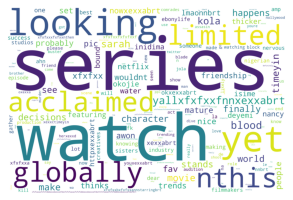

In [63]:
#Running Quick Visualization
#Drawing a wordcloud of cleanied tweets
text="".join(text for text in df.clean_tweets)
print("There are {} words in the combination of all tweets".format(len(text)))
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', collocations=False, stopwords = STOPWORDS).generate(text)
plt.figure(figsize=(5,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('Word Cloud of Tweets')
plt.show()

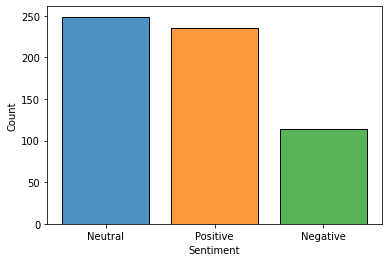

In [64]:
#Visualizing the Sentiment Column
sns.histplot(data=df, x="Sentiment", hue="Sentiment", shrink=.8, alpha=.8, legend=False)
plt.savefig('Distribution of Sentiment')

In [65]:
#Importing Requisite ML Libraries
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
pd.options.mode.chained_assignment = None #disabling a pandas assignment warning on sentiment encoding


from sklearn import model_selection, preprocessing, metrics, linear_model, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import (RandomUnderSampler, 
                                    NearMiss, 
                                    InstanceHardnessThreshold,
                                    CondensedNearestNeighbour,
                                    EditedNearestNeighbours,
                                    RepeatedEditedNearestNeighbours,
                                    AllKNN,
                                    NeighbourhoodCleaningRule,
                                    OneSidedSelection,
                                    TomekLinks)
                                

In [66]:
data=df[['clean_tweets','Sentiment']]
data
#Obtaining the data.

,clean_tweets,Sentiment
0,brt this friendship is thicker than water and...,Neutral
1,brt fk or jola who is more likely to kill som...,Positive
2,brt fk or jola who is more likely to kill som...,Positive
3,bthe audition will be for a supporting or came...,Positive
4,byou could be selected for the next ebonylife ...,Neutral
...,...,...
594,banother episode of out now we dive into one ...,Positive
595,banother episode of out now we dive into one ...,Positive
596,bi finished watching and come really dey love...,Positive
597,b was worth the hype i loved d fact that ramse...,Positive


In [67]:
#Label Encoding the Sentiment Column
data['Sentiment'] = data['Sentiment'].replace('Positive',1)
data['Sentiment'] = data['Sentiment'].replace('Negative',-1)
data['Sentiment'] = data['Sentiment'].replace('Neutral',0)
data

,clean_tweets,Sentiment
0,brt this friendship is thicker than water and...,0
1,brt fk or jola who is more likely to kill som...,1
2,brt fk or jola who is more likely to kill som...,1
3,bthe audition will be for a supporting or came...,1
4,byou could be selected for the next ebonylife ...,0
...,...,...
594,banother episode of out now we dive into one ...,1
595,banother episode of out now we dive into one ...,1
596,bi finished watching and come really dey love...,1
597,b was worth the hype i loved d fact that ramse...,1


In [68]:
#3 unique values on the sentiment column
#-1,Negative;0,Neutral;1,Positive.
data['Sentiment'].unique()

array([ 0,  1, -1], dtype=int64)

In [69]:
#computing unique value counts
data['Sentiment'].value_counts()

 0    249
 1    236
-1    114
Name: Sentiment, dtype: int64

In [70]:
#Our dataset is fairly balanced for the statistics we have computed above
#

In [71]:
#Modelling

In [72]:
#Start with tokenizing the tweets
from nltk.tokenize import TweetTokenizer
  
# Create a reference variable for Class TweetTokenizer
tt = TweetTokenizer()
data['tokenized_tweets'] = data['clean_tweets'].apply(tt.tokenize)
data['tokenized_tweets'].head()
data

,clean_tweets,Sentiment,tokenized_tweets
0,brt this friendship is thicker than water and...,0,"[brt, this, friendship, is, thicker, than, wat..."
1,brt fk or jola who is more likely to kill som...,1,"[brt, fk, or, jola, who, is, more, likely, to,..."
2,brt fk or jola who is more likely to kill som...,1,"[brt, fk, or, jola, who, is, more, likely, to,..."
3,bthe audition will be for a supporting or came...,1,"[bthe, audition, will, be, for, a, supporting,..."
4,byou could be selected for the next ebonylife ...,0,"[byou, could, be, selected, for, the, next, eb..."
...,...,...,...
594,banother episode of out now we dive into one ...,1,"[banother, episode, of, out, now, we, dive, in..."
595,banother episode of out now we dive into one ...,1,"[banother, episode, of, out, now, we, dive, in..."
596,bi finished watching and come really dey love...,1,"[bi, finished, watching, and, come, really, de..."
597,b was worth the hype i loved d fact that ramse...,1,"[b, was, worth, the, hype, i, loved, d, fact, ..."


In [73]:
#stemming the tweets
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(Data):
    text = [st.stem(word) for word in Data]
    return text
data['stemmed_tweets']= data['tokenized_tweets'].apply(lambda x: stemming_on_text(x))
data['stemmed_tweets'].head()


0    [brt, thi, friendship, is, thicker, than, wate...
1    [brt, fk, or, jola, who, is, more, like, to, k...
2    [brt, fk, or, jola, who, is, more, like, to, k...
3    [bthe, audit, will, be, for, a, support, or, c...
4    [byou, could, be, select, for, the, next, ebon...
Name: stemmed_tweets, dtype: object

In [74]:
X=data.clean_tweets
y=data.Sentiment
y = np.array(y)
from sklearn import metrics
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15, random_state =2000)

In [75]:
#Vectorizing the tweets
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X)
X_train_tfidf =  tfidf_vect.transform(X_train)
X_test_tfidf =  tfidf_vect.transform(X_test)

In [76]:
#Modelling the data 
def train_model(name_of_classifier,classifier, feature_vector_train, label, feature_vector_test):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_test)
    f1_micro = metrics.f1_score(y_test,predictions,average = 'micro')
    f1_macro = metrics.f1_score(y_test,predictions,average = 'macro')
    f1_weighted = metrics.f1_score(y_test,predictions,average = 'weighted')
    accuracy = accuracy_score(y_test,predictions)
    return pd.DataFrame({'model':[name_of_classifier],'f1_micro':[f1_micro],'f1_macro':[f1_macro],'f1_weighted':[f1_weighted],'accuracy':[accuracy]})

In [77]:
#Modelling without resampling the dataset
first = train_model('logistc_regression',LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial'),X_train_tfidf, y_train, X_test_tfidf)
#print ("LR Baseline, WordLevel TFIDF: ", accuracyORIGINAL)
second = train_model('SVM',LinearSVC(),X_train_tfidf, y_train, X_test_tfidf)
third =  train_model('BernoulliNB',BernoulliNB(),X_train_tfidf, y_train, X_test_tfidf)
fourth =  train_model('MultinomialNB',MultinomialNB(),X_train_tfidf, y_train, X_test_tfidf)

frames = [first,second,third,fourth]
combined = pd.concat(frames)
combined.reset_index(drop=True, inplace=True)
display(combined)

,model,f1_micro,f1_macro,f1_weighted,accuracy
0,logistc_regression,0.900000,0.871068,0.893370,0.900000
1,SVM,0.944444,0.931262,0.942587,0.944444
2,BernoulliNB,0.866667,0.846100,0.862740,0.866667
3,MultinomialNB,0.888889,0.879788,0.887495,0.888889


In [78]:
#Modelling with Random oversampling
ros = RandomOverSampler(random_state=777)
ros_X_train_tfidf, ros_y_train = ros.fit_resample(X_train_tfidf, y_train)

first = train_model('logistc_regression',LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial'),ros_X_train_tfidf, ros_y_train, X_test_tfidf)
#print ("LR Baseline, WordLevel TFIDF: ", accuracyORIGINAL)
second = train_model('SVM',LinearSVC(),ros_X_train_tfidf, ros_y_train, X_test_tfidf)
third =  train_model('BernoulliNB',BernoulliNB(),ros_X_train_tfidf, ros_y_train, X_test_tfidf)
fourth =  train_model('MultinomialNB',MultinomialNB(),ros_X_train_tfidf, ros_y_train, X_test_tfidf)

frames = [first,second,third,fourth]
combined = pd.concat(frames)
combined.reset_index(drop=True, inplace=True)
display(combined)

,model,f1_micro,f1_macro,f1_weighted,accuracy
0,logistc_regression,0.933333,0.914731,0.930304,0.933333
1,SVM,0.944444,0.931262,0.942587,0.944444
2,BernoulliNB,0.866667,0.835668,0.859259,0.866667
3,MultinomialNB,0.888889,0.881336,0.888005,0.888889


In [79]:
#Implementing LSTM For Text Classification

import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa

In [80]:
#obtaining data 
data
#data is cleaned as in previous steps,tokenized and stemmed.

,clean_tweets,Sentiment,tokenized_tweets,stemmed_tweets
0,brt this friendship is thicker than water and...,0,"[brt, this, friendship, is, thicker, than, wat...","[brt, thi, friendship, is, thicker, than, wate..."
1,brt fk or jola who is more likely to kill som...,1,"[brt, fk, or, jola, who, is, more, likely, to,...","[brt, fk, or, jola, who, is, more, like, to, k..."
2,brt fk or jola who is more likely to kill som...,1,"[brt, fk, or, jola, who, is, more, likely, to,...","[brt, fk, or, jola, who, is, more, like, to, k..."
3,bthe audition will be for a supporting or came...,1,"[bthe, audition, will, be, for, a, supporting,...","[bthe, audit, will, be, for, a, support, or, c..."
4,byou could be selected for the next ebonylife ...,0,"[byou, could, be, selected, for, the, next, eb...","[byou, could, be, select, for, the, next, ebon..."
...,...,...,...,...
594,banother episode of out now we dive into one ...,1,"[banother, episode, of, out, now, we, dive, in...","[banoth, episod, of, out, now, we, dive, into,..."
595,banother episode of out now we dive into one ...,1,"[banother, episode, of, out, now, we, dive, in...","[banoth, episod, of, out, now, we, dive, into,..."
596,bi finished watching and come really dey love...,1,"[bi, finished, watching, and, come, really, de...","[bi, finish, watch, and, come, realli, dey, lo..."
597,b was worth the hype i loved d fact that ramse...,1,"[b, was, worth, the, hype, i, loved, d, fact, ...","[b, wa, worth, the, hype, i, love, d, fact, th..."


In [ ]:
#tweets are cleaned,tokenized and lemmatized.

In [81]:
#one hot encoding the sentiment column 
Y = pd.get_dummies(data.Sentiment).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (599, 3)


In [82]:
#checking how Y looks like
Y

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0]], dtype=uint8)

In [83]:
#Convert Lemmatized tweets to vectors that will be used
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 500
# Max number of words in each tweets.
MAX_SEQUENCE_LENGTH = 50
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, split=' ') 
tokenizer.fit_on_texts(data.stemmed_tweets.values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 1086 unique tokens.


In [ ]:
#1086 unique tokens were found
#The above code does the following:
#vectorize the lemmatized tweets.
#Limit the data set to the top 500 words.
#Set the max number of words in each tweet at 50

In [84]:
#shape of the data tensor
X = tokenizer.texts_to_sequences(data.stemmed_tweets.values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (599, 50)


In [85]:
#Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.15, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(509, 50) (509, 3)
(90, 50) (90, 3)


In [ ]:
#Modelling
#The first layer is the embedded layer that uses 100 length vectors to represent each word.
#SpatialDropout1D performs variational dropout in NLP models.
#The next layer is the LSTM layer with 100 memory units.
#The output layer must create 3 output values, one for each class.
#Activation function is softmax for multi-class classification.
#Because it is a multi-class classification problem, categorical_crossentropy is used as the loss function.

In [88]:
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(2)
f1 = tfa.metrics.F1Score(36,'micro' or 'macro')
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1])

epochs = 7
batch_size = 64

In [89]:
history_1 = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/7
8/8 [==============================] - 8s 232ms/step - loss: 1.0655 - accuracy: 0.6288 - f1_score: 0.6288 - val_loss: 0.9936 - val_accuracy: 0.6275 - val_f1_score: 0.6275
Epoch 2/7
8/8 [==============================] - 1s 113ms/step - loss: 0.9270 - accuracy: 0.6026 - f1_score: 0.6026 - val_loss: 0.8874 - val_accuracy: 0.7843 - val_f1_score: 0.7843
Epoch 3/7
8/8 [==============================] - 1s 116ms/step - loss: 0.7717 - accuracy: 0.8581 - f1_score: 0.8581 - val_loss: 0.6759 - val_accuracy: 0.7255 - val_f1_score: 0.7255
Epoch 4/7
8/8 [==============================] - 1s 109ms/step - loss: 0.5433 - accuracy: 0.8493 - f1_score: 0.8493 - val_loss: 0.5150 - val_accuracy: 0.7451 - val_f1_score: 0.7451
Epoch 5/7
8/8 [==============================] - 1s 110ms/step - loss: 0.3418 - accuracy: 0.9105 - f1_score: 0.9105 - val_loss: 0.3396 - val_accuracy: 0.8431 - val_f1_score: 0.8431
Epoch 6/7
8/8 [==============================] - 1s 121ms/step - loss: 0.2349 - accuracy: 0.912

In [ ]:
#After training over 8 epochs: accuracy score of 93.23% ; Validation accuracy of 86.27%

In [ ]:
#checking against our test data

In [90]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

3/3 [==============================] - 0s 15ms/step - loss: 0.3141 - accuracy: 0.8889 - f1_score: 0.8889
Test set
  Loss: 0.314
  Accuracy: 0.889


In [ ]:
#test data had an accuracy score of 88.9% 
#

In [ ]:
#plotting the results

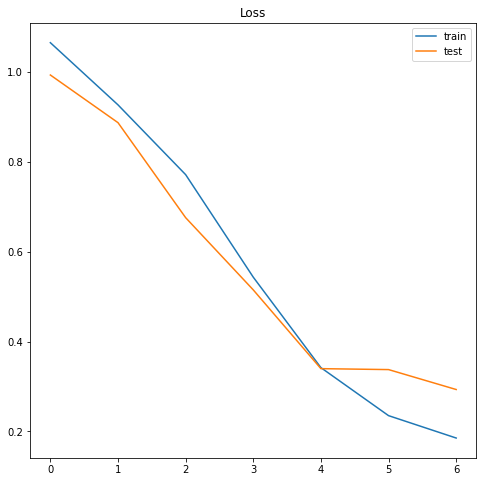

<Figure size 432x288 with 0 Axes>

In [93]:
plt.figure(figsize=(8, 8))
plt.title('Loss')
plt.plot(history_1.history['loss'], label='train')
plt.plot(history_1.history['val_loss'], label='test')
plt.legend()
plt.show()
plt.savefig('Loss Plot')

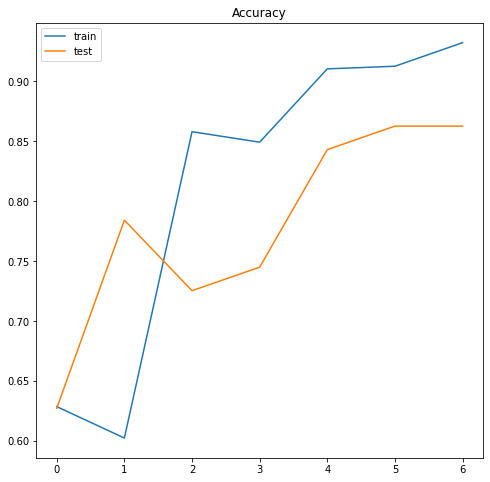

<Figure size 432x288 with 0 Axes>

In [94]:
plt.figure(figsize=(8, 8))
plt.title('Accuracy')
plt.plot(history_1.history['accuracy'], label='train')
plt.plot(history_1.history['val_accuracy'], label='test')
plt.legend()
plt.show()
plt.savefig('Accuracy Plot')

In [ ]:
#From the plot there was a bit of overfitting with the model
#with a bit more data collected will be able to work around this.

In [95]:
#Testing with a new tweet
tweet = ["If there’s anything I learnt from #BloodSisters then it is “whatever situation you find yourself, knack first🙏👍. Gabriel afolayan and his wife 😭😭😭ashawos wey Dey disguise 😭😭😂"]
seq = tokenizer.texts_to_sequences(tweet)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['negative','neutral','positive']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 1s 1s/step
[[0.29812905 0.35429028 0.3475807 ]] neutral


In [ ]:
#our new tweet has a predicted label of neutral.

In [ ]:
#further develpoment
#1. creating a webapp to allow input of tweets 
#2. pipeline to be able to extract tweets